In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [3]:
#Setting up Vader Sentiment analysis tool
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    #print("{:-<40} {}".format(sentence, str(score)))
    return score['compound']

In [4]:
#simplify to trinary
def sentiment_analyzer_scores_modified(sentence):
    score = analyser.polarity_scores(sentence)
    if score['compound'] <= -0.33:
        returnscore=-1
    elif score['compound'] >=0.5:
        returnscore = 1
    else:
        returnscore = 0
    return returnscore

In [179]:
#sample output
sentiment_analyzer_scores("The phone is super cool.")

The phone is super cool.---------------- {'neg': 0.0, 'neu': 0.326, 'pos': 0.674, 'compound': 0.7351}


0.7351

In [6]:
sentiment_analyzer_scores_modified("This phone is super cool")

1

In [7]:
sentiment_analyzer_scores("The phone sucks!")

The phone sucks!------------------------ {'neg': 0.583, 'neu': 0.417, 'pos': 0.0, 'compound': -0.4199}


In [5]:
sentiment_analyzer_scores_modified("This phone sucks!")

-1

In [7]:
cd /Volumes/Backup\ Plus

/Volumes/Backup Plus


In [45]:
cd /Users/kwanjeffrey/Desktop/Pioneer/

/Users/kwanjeffrey/Desktop/Pioneer


In [8]:
#read dataset into pandas
data = pd.read_table("wuhanNoRT3.txt",header=None, sep="\*\|\*")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [9]:
data

,0,1,2,3,4,5
0,kitty_janusz,2020-01-24,Nick & Katrina of Paranormal Lockdown push the...,0.0,0.0,3.0
1,uppychatterjee,2020-01-24,oh my god the guy that just called into @tripl...,2.0,1.0,27.0
2,ImmalitS,2020-01-24,I’m in Wuhan. I’m a Wuhan citizen. We support ...,1.0,0.0,2.0
3,bennytheshap,2020-01-24,Quarantine. pic.twitter.com/XhXzMGt89N,0.0,0.0,1.0
4,DeeRaynerxx,2020-01-24,"thanks mate ❤️❤️❤️ all good, quarantine life j...",0.0,0.0,0.0
...,...,...,...,...,...,...
111756,beltandroadblog,2020-01-25,"China Expands Virus Lockdown, Encircling 35 Mi...",0.0,0.0,2.0
111757,OccupyOcupy,2020-01-25,Spending Chinese new year under lockdown in Wu...,0.0,0.0,0.0
111758,FedgeNo,2020-01-25,Spending Chinese new year under lockdown in Wu...,0.0,0.0,0.0
111759,KATVNews,2020-01-25,China expanded its lockdown against the deadly...,0.0,1.0,2.0


In [50]:
data.columns

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [10]:
#set headers
header=['user','date','tweet','replies','retweets','likes']

In [11]:
data.columns=header

In [12]:
#read the other dataset
data2 = pd.read_table("pandemicglobalNoRT3.txt",header=None, sep="\*\|\*")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [13]:
data2.columns=header

In [238]:
data2

,user,date,tweet,replies,retweets,likes
0,Popenici,2020-03-09,Two US lawmakers exposed to coronavirus before...,0.0,0.0,0.0
1,LF_Found,2020-03-09,That is literally the opposite of what you sho...,0.0,1.0,1.0
2,iamoykudogan,2020-03-09,The whole country is in lockdown #COVID19itali...,0.0,0.0,1.0
3,ilgizilgiz2,2020-03-09,what percentage of US companies will be able t...,1.0,0.0,0.0
4,Diplomacy140,2020-03-09,#Breaking #Italy is extending its virus contai...,0.0,0.0,0.0
...,...,...,...,...,...,...
225709,MGG_istooshort,2020-03-03,This does not make it safe at all - the deaths...,0.0,0.0,0.0
225710,yung_quarantine,2020-03-03,I'll be over tomorrow with some good stuff,0.0,0.0,1.0
225711,CaitoGrace,2020-03-03,People are so fucking stupid! They recommend 2...,0.0,0.0,1.0
225712,MMOMONKEYcom,2020-03-03,Counter-Strike: Global Offensive Tournament In...,0.0,0.0,0.0


In [73]:
data['Date']

0          2020-03-14
1          2020-03-14
2          2020-03-14
3          2020-03-14
4          2020-03-14
              ...    
2644675    2020-05-27
2644676    2020-05-27
2644677    2020-05-27
2644678    2020-05-27
2644679    2020-05-27
Name: Date, Length: 2644680, dtype: object

In [14]:
#get the number of tweets per day
counts = data.groupby(['date']).size().reset_index(name="counts")

In [71]:
counts[2:] #first two rows had some weird values

,date,counts
2,2020-01-15,3623
3,2020-01-16,3295
4,2020-01-17,3452
5,2020-01-18,2149
6,2020-01-19,2323
7,2020-01-20,3413
8,2020-01-21,3752
9,2020-01-22,6643
10,2020-01-23,12013
11,2020-01-24,9633


In [15]:
#rip out the date column to use in plt
date = list(counts["date"])

In [24]:
date

['0',
 '1',
 '2020-01-15',
 '2020-01-16',
 '2020-01-17',
 '2020-01-18',
 '2020-01-19',
 '2020-01-20',
 '2020-01-21',
 '2020-01-22',
 '2020-01-23',
 '2020-01-24',
 '2020-01-25',
 '2020-01-26',
 '2020-01-27',
 '2020-01-28',
 '2020-01-29',
 '2020-01-30']

In [16]:
#rip out the counts column
count = list(counts["counts"])

In [29]:
labels = date[2:]
x = date[2:]
y = count[2:]

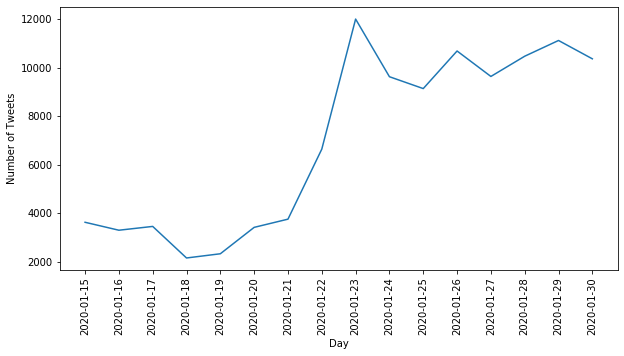

In [31]:
plt.figure(figsize=(10,5))
plt.plot(x,y) #first two values were weird
plt.ylabel('Number of Tweets')
plt.xlabel('Day')
plt.xticks(x, labels, rotation='vertical') # rotate labels
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.savefig('VolumeWuhan.png')
plt.show()

In [33]:
#grab number of retweets per day
RT = data.groupby(['date'])['retweets'].sum()

In [34]:
list(RT)

[0.0,
 0.0,
 12763.0,
 6175.0,
 4524.0,
 3058.0,
 2764.0,
 4398.0,
 9720.0,
 46419.0,
 58408.0,
 78691.0,
 47011.0,
 62075.0,
 37470.0,
 28951.0,
 36290.0,
 53586.0]

In [35]:
#grab number of replies per day
RP = data.groupby(['date'])['replies'].sum()

In [36]:
list(RP)

[0.0,
 0.0,
 2707.0,
 2012.0,
 1694.0,
 1077.0,
 1049.0,
 1593.0,
 2779.0,
 6443.0,
 8898.0,
 8342.0,
 7590.0,
 10009.0,
 7679.0,
 8579.0,
 8430.0,
 8147.0]

In [37]:
aggregate = []

In [38]:
#sum tweets, retweets, replies
for i in range(len(RP)):
    aggregate.append(count[i] + RP[i] + RT[i])

In [39]:
aggregate

[2.0,
 1.0,
 19093.0,
 11482.0,
 9670.0,
 6284.0,
 6136.0,
 9404.0,
 16251.0,
 59505.0,
 79319.0,
 96666.0,
 63744.0,
 82779.0,
 54793.0,
 48009.0,
 55849.0,
 72105.0]

In [40]:
labels = date[2:]
x = date[2:]
y = aggregate[2:]

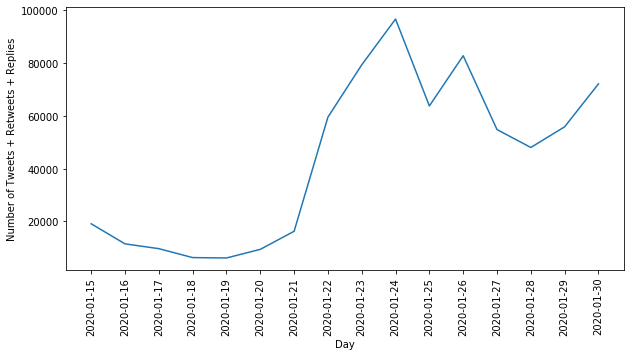

In [43]:
plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.xticks(x, labels, rotation='vertical') # rotate labels
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.ylabel('Number of Tweets + Retweets + Replies')
plt.xlabel('Day')
plt.savefig('VolumeWuhanRT.png')
plt.show()

In [ ]:
#########################################################################################################

In [ ]:
#sentiment analysis

In [86]:
data

,User,Date,Tweet
0,ethealthworld,2020-03-14,"ETHealthworld | Spain announces a lockdown, Fr..."
1,mustalafin,2020-03-14,"Pekok di pelihara ya kayak gini, mikir perut s..."
2,matthewgaylor,2020-03-14,"I’m going to guess, that states will go on com..."
3,kylexpowis,2020-03-14,Bro don’t be daft we don’t have enough ICU bed...
4,marmstadt,2020-03-14,"June 2020, after 3 1/2 months of global lockdo..."
...,...,...,...
2644675,sharmarajiv101,2020-05-27,@AMISHDEVGAN सवाल \r\nगोयल जी से \r\nइनको प्र...
2644676,umangjain14july,2020-05-27,"@AMISHDEVGAN sir,\r\n\r\nAsk congress spokespe..."
2644677,newsbreakngr,2020-05-27,Air Ticket Fares To Increase By 45 Per Cent As...
2644678,turn2us_org,2020-05-27,UK food banks are seeing demand soar by up to ...


In [61]:
#grab tweets into a list because it's easier to loop through
tweet = list(data['tweet'])

In [70]:
#initialize lists
VaderPos = []

VaderNeu = []

VaderNeg = []

Sentiment = []

In [46]:
Sentiment = []

In [48]:
#progress bar
from tqdm import tqdm

In [71]:
#debugging purposes
s=0

In [72]:
for row in tqdm(range(len(tweet))):
    s = int(sentiment_analyzer_scores_modified(tweet[row]))
    if s == 1:
        VaderPos.append(1)
    else:
        VaderPos.append(0)
        
    

100%|██████████| 111761/111761 [00:31<00:00, 3602.90it/s]


In [59]:
tweet.pop(50298)

"Very interesting video for u who want to know more about the #Wuhan #CoronaVirus & how the situation looks like in Wuhan  This vid was recorded today by a journalist who was 1 of the last to make it in to Wuhan before the quarantine  He says he's sick now   https://www.youtube.com/watch?time_continue=4&v=7AI3R41dGnU&feature=emb_title\xa0…"

In [73]:
for row in tqdm(range(len(tweet))):
    s = int(sentiment_analyzer_scores_modified(tweet[row]))
    if s == 0:
        VaderNeu.append(1)
    else:
        VaderNeu.append(0)

100%|██████████| 111761/111761 [00:31<00:00, 3593.17it/s]


In [74]:
for row in tqdm(range(len(tweet))):
    s = int(sentiment_analyzer_scores_modified(tweet[row]))
    if s == -1:
        VaderNeg.append(1)
    else:
        VaderNeg.append(0)

100%|██████████| 111761/111761 [00:33<00:00, 3364.14it/s]


In [75]:
#get the compound score
for row in tqdm(range(len(tweet))):
    s = float(sentiment_analyzer_scores(tweet[row]))
    Sentiment.append(s)

100%|██████████| 111761/111761 [00:29<00:00, 3758.19it/s]


In [76]:
#check for missing values
len(VaderPos)

111761

In [77]:
len(VaderNeu)

111761

In [78]:
len(VaderNeg)

111761

In [79]:
len(Sentiment)

111761

In [80]:
#add sentiment columns to dataframe
data = data.assign(VaderPos=VaderPos,VaderNeu=VaderNeu,VaderNeg=VaderNeg,Sentiment=Sentiment)

In [254]:
#save progress
data.to_csv('/Volumes/Backup Plus/WuhanSentiment.csv',sep="\t",index=False, encoding = "utf-8")

In [81]:
#sum all positive tweets per day
Pos = data.groupby(['date'])['VaderPos'].sum()

In [82]:
Neu = data.groupby(['date'])['VaderNeu'].sum()

In [83]:
Neg = data.groupby(['date'])['VaderNeg'].sum()

In [84]:
#average all raw sentiment scores
Sen = data.groupby(['date'])['Sentiment'].mean()

In [85]:
Pos

date
0                0
1                0
2020-01-15     605
2020-01-16     608
2020-01-17     644
2020-01-18     389
2020-01-19     441
2020-01-20     707
2020-01-21     625
2020-01-22     871
2020-01-23    1157
2020-01-24    1453
2020-01-25    1228
2020-01-26    1221
2020-01-27    1307
2020-01-28    1499
2020-01-29    1592
2020-01-30    1416
Name: VaderPos, dtype: int64

In [86]:
Neu

date
0                2
1                1
2020-01-15    2226
2020-01-16    2086
2020-01-17    2273
2020-01-18    1371
2020-01-19    1464
2020-01-20    2193
2020-01-21    2213
2020-01-22    3956
2020-01-23    7234
2020-01-24    5389
2020-01-25    5283
2020-01-26    6159
2020-01-27    5686
2020-01-28    6386
2020-01-29    6825
2020-01-30    6095
Name: VaderNeu, dtype: int64

In [197]:
Neg

date
0                0
1                0
2020-01-15     792
2020-01-16     601
2020-01-17     535
2020-01-18     389
2020-01-19     418
2020-01-20     513
2020-01-21     914
2020-01-22    1816
2020-01-23    3622
2020-01-24    2791
2020-01-25    2632
2020-01-26    3315
2020-01-27    2651
2020-01-28    2594
2020-01-29    2712
2020-01-30    2861
Name: VaderNeg, dtype: int64

In [198]:
Sen

date
0             0.000000
1             0.000000
2020-01-15    0.035437
2020-01-16    0.066490
2020-01-17    0.085964
2020-01-18    0.071972
2020-01-19    0.077777
2020-01-20    0.119931
2020-01-21    0.017111
2020-01-22   -0.044074
2020-01-23   -0.089037
2020-01-24   -0.043704
2020-01-25   -0.054459
2020-01-26   -0.088805
2020-01-27   -0.040305
2020-01-28   -0.012713
2020-01-29   -0.013578
2020-01-30   -0.030573
Name: Sentiment, dtype: float64

In [87]:
labels = date[2:]
x = date[2:]


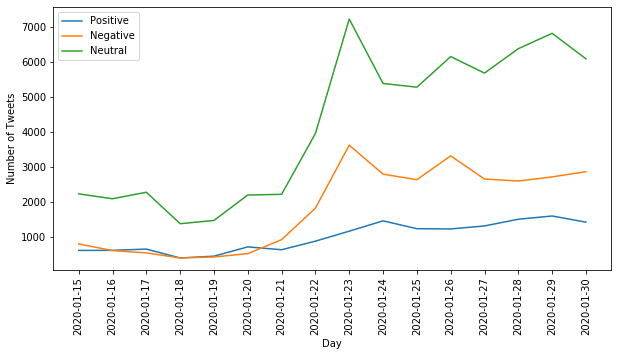

In [89]:
plt.figure(figsize=(10,5))
plt.plot(x,Pos[2:], label="Positive")
plt.plot(x,Neg[2:], label="Negative")
plt.plot(x,Neu[2:], label="Neutral")
plt.xticks(x, labels, rotation='vertical') # rotate labels
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.ylabel('Number of Tweets')
plt.xlabel('Day')
plt.legend()
plt.savefig=('/Users/kwanjeffrey/Desktop/Pioneer/SentimentVolumeWuhan.png')
plt.show()
#doesn't save for some reason

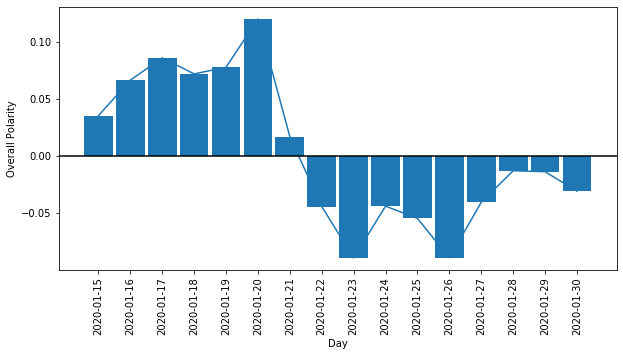

In [90]:
plt.figure(figsize=(10,5))
plt.plot(x,Sen[2:], label="Overall Sentiment")
plt.axhline( color='black')
plt.bar(x, Sen[2:], width=0.9,align='center')
plt.xticks(x, labels, rotation='vertical') # rotate labels
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.ylabel('Overall Polarity')
plt.xlabel('Day')
plt.savefig=('/Users/kwanjeffrey/Desktop/Pioneer/SentimentWuhan.png')
plt.show()

In [ ]:
#spot check Vader classification

In [139]:
list(data.loc[data['VaderNeu'] == 1]['tweet'])

['Nick & Katrina of Paranormal Lockdown push their minds & bodies to the edge for evidence  http://bit.ly/ITLP0105MP3\xa0 pic.twitter.com/XITTFSALtQ',
 'Quarantine.  pic.twitter.com/XhXzMGt89N',
 '11+ mil people in quarantine so I imagine this number is going to keep increasing.',
 'By the military enforcing the quarantine through martial law.',
 '48 million people in 16 cities under quarantine last I heard?   https://www.thepostmillennial.com/why-hasnt-canada-restricted-incoming-flights-from-china/\xa0…',
 'all major quarantine locations listed here...  https://decolonialatlas.wordpress.com/2019/04/27/names-and-locations-of-the-top-100-people-killing-the-planet/\xa0…',
 'Quarantine measures. #CoronavirusOutbreak https://twitter.com/cnnphilippines/status/1220282693104963584\xa0…',
 'Beijing ta bem vazia por conta do feriado, mas td lugar q vou praticamente 100% das pessoas estao usando máscaras. Os eventos comemorativos por conta do ano novo foram cancelados.Em Shanghai por ex.Disney i

In [142]:
list(data.loc[data['VaderNeg'] == 1]['tweet'])

['I just watched quarantine for the first time and that shit scared the FUCK outta me',
 '“I’m jamming out to the #hottest100 while in quarantine for Coronavirus” 😧',
 'What a shock health authorities said they didn’t have to quarantine and mass test airports. It’s only going to kill those with weak immune systems like our elderly. 🙄🤦🏼\u200d♀️🧐  pic.twitter.com/cHdadTLgzA',
 '41 Dead, 1,000 Affected In China From Wuhan Virus, 14 Cities In Lockdown@  https://www.ndtv.com/world-news/wuhan-virus-china-coronavirus-kills-41-people-13-cities-remain-under-quarantine-2169415\xa0…',
 'China expands coronavirus outbreak lockdown as death toll rises',
 'No, its a fake news, do not spread it. There is nothing to panic even it is correct because even in ground zero, people who died were old and had other co-morbidities. We just need to quarantine the infected ones to curtail its spread.',
 "'World will get infected' Nurse at body-strewn hospital says quarantine failing  https://www.dailystar.co.uk/

In [143]:
list(data.loc[data['VaderPos'] == 1]['tweet'])

['oh my god the guy that just called into @triplej so chirpily saying he’s currently in quarantine for the coronavirus but “IT’S ALL GOOD triple j is keeping us company” UMMMMM u crazy',
 'I’m in Wuhan. I’m a Wuhan citizen. We support every nurses and Dr. We organize a volunteer group to help pick all nurses and dr from hospital to home due to the city lockdown. We got free medical care and supplies from all over the country.',
 'thanks mate ❤️❤️❤️ all good, quarantine life just means eating all day apparently',
 'wow a whole city lockdown and they said they shuttin down a couple more ....  https://twitter.com/ConflictsW/status/1220069758005121025\xa0…',
 'Its been long time never open my account,and now i forcing my self to reopen on the sake of my new job :D',
 'Probably best to quarantine  China. .... just saying. ...  #CoronavirusOutbreak',
 'Excellent model! Nice way to quarantine infected & uninfected! #coronavirus #WuhanOutbreak #WuhanLockDown #WuhanFlu @PMOIndia @narendramodi @

In [152]:
sentiment_analyzer_scores( '💔 My heart breaks man. . Hope they have shut down that market completely and cleanse them. Hopefully these people can be cured. Hopefully they be responsible to quarantine themselves and not get out of the area. Pls get yourself check if you have flu.')

💔 My heart breaks man. . Hope they have shut down that market completely and cleanse them. Hopefully these people can be cured. Hopefully they be responsible to quarantine themselves and not get out of the area. Pls get yourself check if you have flu. {'neg': 0.09, 'neu': 0.587, 'pos': 0.322, 'compound': 0.9274}


In [141]:
#should be more negative
sentiment_analyzer_scores('Gosh. Pls quarantine them completely and cancel all in and out flight from China from the time being.')

Gosh. Pls quarantine them completely and cancel all in and out flight from China from the time being. {'neg': 0.116, 'neu': 0.817, 'pos': 0.066, 'compound': -0.2449}


In [144]:
#sarcasm
sentiment_analyzer_scores('Probably best to quarantine  China. .... just saying. ...  #CoronavirusOutbreak')

Probably best to quarantine  China. .... just saying. ...  #CoronavirusOutbreak {'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.6369}


In [145]:
#should be neutral
sentiment_analyzer_scores( 'Yeah but honestly there’s no reason to quarantine entire 20 million population just over few deaths, numbers are definitely dodgy here.')

Yeah but honestly there’s no reason to quarantine entire 20 million population just over few deaths, numbers are definitely dodgy here. {'neg': 0.17, 'neu': 0.528, 'pos': 0.302, 'compound': 0.6124}


In [146]:
sentiment_analyzer_scores( 'I would like to stay in quarantine until this coronavirus is handled pls and thank u')

I would like to stay in quarantine until this coronavirus is handled pls and thank u {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.6486}


In [147]:
sentiment_analyzer_scores( 'Alamak GG, let’s quarantine together then not boring 😂')

Alamak GG, let’s quarantine together then not boring 😂 {'neg': 0.108, 'neu': 0.566, 'pos': 0.326, 'compound': 0.5943}


In [150]:
sentiment_analyzer_scores( "I know nothing but what I've googled since reading that, but I see that R0 is well below many of the classic infectious diseases (smallpox, pertussis, measles) and I think authorities understand epidemiology and quarantine much better now.  I hope.")

I know nothing but what I've googled since reading that, but I see that R0 is well below many of the classic infectious diseases (smallpox, pertussis, measles) and I think authorities understand epidemiology and quarantine much better now.  I hope. {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.8847}


In [153]:
sentiment_analyzer_scores( 'Thx for ur tweets, very useful.  Re: quarantine, do u think it has use in reducing velocity of spread around China
'+ world, compared to if no quarantine at all? I.e. is it "horse out of barn, too late to shut door" or "1 horse out of barn, 
'but some still inside, so shut the door"?')

Thx for ur tweets, very useful.  Re: quarantine, do u think it has use in reducing velocity of spread around China+world, compared to if no quarantine at all? I.e. is it "horse out of barn, too late to shut door" or "1 horse out of barn, but some still inside, so shut the door"? {'neg': 0.028, 'neu': 0.898, 'pos': 0.074, 'compound': 0.3831}


In [115]:
#more tweaking needed

In [ ]:
#a lot of neutral tweets have scores of 0.6 ish, but there are positive tweets with that score too. I'm afraid that it would be imbalanced if
#I gave positive tweets such a narrow margin compared to the other two categories

In [ ]:
#Vader doesn't seem to do very well with the word quarantine. I don't know how to tweak Vader such that using quarantine as a verb has a slightly negative connotation
#also doesn't do very well with sarcasm
#'just saying' tends to indicate sarcasm

In [ ]:
#########################################################################################################

In [ ]:
#rinse and repeat with the other dataset

In [239]:
counts2 = data2.groupby(['date']).size().reset_index(name="counts")
counts2

,date,counts
0,0,5
1,2020-03-03,19428
2,2020-03-04,19292
3,2020-03-05,22998
4,2020-03-06,24087
5,2020-03-07,34482
6,2020-03-08,43451
7,2020-03-09,61970
8,3,1


In [240]:
date2 = list(counts2["date"])
date2

['0',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-07',
 '2020-03-08',
 '2020-03-09',
 '3']

In [241]:
count2 = list(counts2["counts"])
count2

[5, 19428, 19292, 22998, 24087, 34482, 43451, 61970, 1]

TypeError: 'str' object is not callable

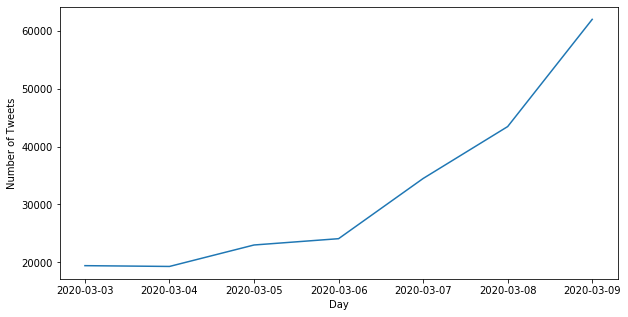

In [242]:
plt.figure(figsize=(10,5))
plt.plot(date2[1:-1],count2[1:-1])

plt.ylabel('Number of Tweets')
plt.xlabel('Day')
plt.savefig('VolumeWuhan2.png')
plt.show()

In [243]:
#grab number of retweets per day
RT2 = data2.groupby(['date'])['retweets'].sum()

list(RT2)

#grab number of replies per day
RP2 = data2.groupby(['date'])['replies'].sum()

list(RP2)

aggregate2 = []

#sum tweets, retweets, replies
for i in range(len(RP2)):
    aggregate2.append(count[i] + RP2[i] + RT2[i])

aggregate2

[7.0,
 113914.0,
 92169.0,
 79479.0,
 199375.0,
 184336.0,
 251934.0,
 564179.0,
 3817.0]

In [244]:
list(RP2)

[5.0, 16946.0, 17329.0, 17992.0, 21422.0, 32508.0, 62675.0, 100878.0, 65.0]

TypeError: 'str' object is not callable

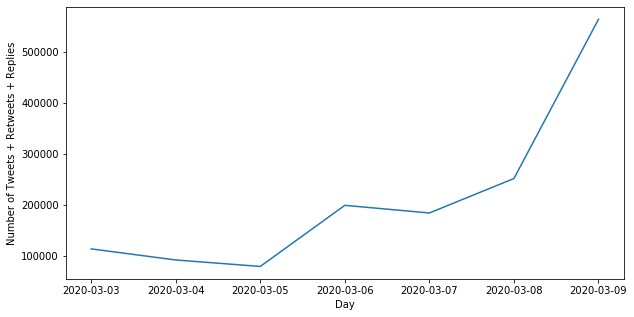

In [245]:
plt.figure(figsize=(10,5))
plt.plot(date2[1:-1],aggregate2[1:-1])

plt.ylabel('Number of Tweets + Retweets + Replies')
plt.xlabel('Day')
plt.savefig('VolumeWuhanRT2.png')
plt.show()

In [246]:
#grab tweets into a list because it's easier to loop through
tweet2 = list(data2['tweet'])

#initialize lists
VaderPos2 = []

VaderNeu2 = []

VaderNeg2 = []

Sentiment2 = []

Sentiment2 = []

VaderPos2 = []

#progress bar
from tqdm import tqdm

#debugging purposes
s=0

for row in tqdm(range(len(tweet2))):
    s = int(sentiment_analyzer_scores_modified(tweet2[row]))
    if s == 1:
        VaderPos2.append(1)
    else:
        VaderPos2.append(0)
        
    

for row in tqdm(range(len(tweet2))):
    s = int(sentiment_analyzer_scores_modified(tweet2[row]))
    if s == 0:
        VaderNeu2.append(1)
    else:
        VaderNeu2.append(0)

for row in tqdm(range(len(tweet2))):
    s = int(sentiment_analyzer_scores_modified(tweet2[row]))
    if s == -1:
        VaderNeg2.append(1)
    else:
        VaderNeg2.append(0)

#get the compound score
for row in tqdm(range(len(tweet))):
    s = float(sentiment_analyzer_scores(tweet2[row]))
    Sentiment.append(s)


100%|██████████| 111761/111761 [00:39<00:00, 2864.68it/s]


In [247]:
Sentiment2=[]
#get the compound score
for row in tqdm(range(len(tweet2))):
    s = float(sentiment_analyzer_scores(tweet2[row]))
    Sentiment2.append(s)

100%|██████████| 225714/225714 [01:29<00:00, 2535.33it/s]


In [251]:
Sentiment2

[-0.0772,
 0.3182,
 0.0,
 -0.4836,
 0.0,
 0.6249,
 -0.5423,
 -0.2869,
 -0.1927,
 -0.0941,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1027,
 0.9062,
 -0.7964,
 -0.9578,
 -0.4404,
 -0.4404,
 0.516,
 -0.5423,
 0.0516,
 0.3612,
 0.0,
 -0.4588,
 -0.9765,
 0.4767,
 0.0382,
 0.0,
 0.4588,
 0.2023,
 -0.5994,
 0.0,
 0.0,
 0.0,
 -0.5318,
 0.5411,
 0.0,
 0.0772,
 -0.2651,
 0.0,
 0.128,
 -0.6939,
 0.5719,
 0.0,
 -0.2263,
 0.4753,
 -0.7959,
 -0.8976,
 0.0,
 0.0,
 0.1027,
 0.0,
 0.3612,
 -0.4391,
 0.0,
 0.3612,
 -0.5893,
 0.128,
 0.4588,
 -0.3182,
 0.4939,
 -0.5719,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2023,
 0.75,
 -0.5423,
 0.0,
 0.0772,
 0.3818,
 0.3182,
 0.3182,
 0.0,
 -0.3818,
 -0.2789,
 0.2023,
 -0.3182,
 0.0,
 -0.2617,
 0.5423,
 0.0,
 -0.5267,
 0.4939,
 0.0,
 -0.0516,
 0.0,
 0.3818,
 0.0,
 -0.5859,
 0.6739,
 0.0,
 0.6908,
 -0.4404,
 0.3626,
 0.0,
 -0.1531,
 0.0,
 -0.5267,
 -0.1406,
 -0.6447,
 0.1027,
 -0.4215,
 0.6249,
 0.0,
 -0.9251,
 -0.4359,
 0.6486,
 -0.0516,
 0.0,
 0.0,
 -0.5279,
 -0.5938,
 0.8024,
 -0.1531,
 0.8

In [253]:


len(VaderPos2)

len(VaderNeu2)

len(VaderNeg2)

len(Sentiment2)

data2 = data2.assign(VaderPos2=VaderPos2,VaderNeu2=VaderNeu2,VaderNeg2=VaderNeg2,Sentiment2=Sentiment2)

data2.to_csv('/Volumes/Backup Plus/PandemicSentiment2.csv',sep="\t",index=False, encoding = "utf-8")

In [255]:
Pos2 = data2.groupby(['date'])['VaderPos2'].sum()

Neu2 = data2.groupby(['date'])['VaderNeu2'].sum()

Neg2 = data2.groupby(['date'])['VaderNeg2'].sum()

Sen2 = data2.groupby(['date'])['Sentiment2'].mean()

In [256]:
Pos2

date
0                0
2020-03-03    3063
2020-03-04    2995
2020-03-05    3574
2020-03-06    3885
2020-03-07    4404
2020-03-08    6474
2020-03-09    8574
3                0
Name: VaderPos2, dtype: int64

In [257]:

Neu2

date
0                 5
2020-03-03    11551
2020-03-04    11551
2020-03-05    13669
2020-03-06    14244
2020-03-07    19928
2020-03-08    25527
2020-03-09    38004
3                 1
Name: VaderNeu2, dtype: int64

In [258]:
Neg2

date
0                 0
2020-03-03     4814
2020-03-04     4746
2020-03-05     5755
2020-03-06     5958
2020-03-07    10150
2020-03-08    11450
2020-03-09    15392
3                 0
Name: VaderNeg2, dtype: int64

In [259]:
Sen2


date
0             0.000000
2020-03-03   -0.000196
2020-03-04   -0.004560
2020-03-05   -0.006798
2020-03-06   -0.001195
2020-03-07   -0.073989
2020-03-08   -0.024474
2020-03-09   -0.017872
3             0.000000
Name: Sentiment2, dtype: float64

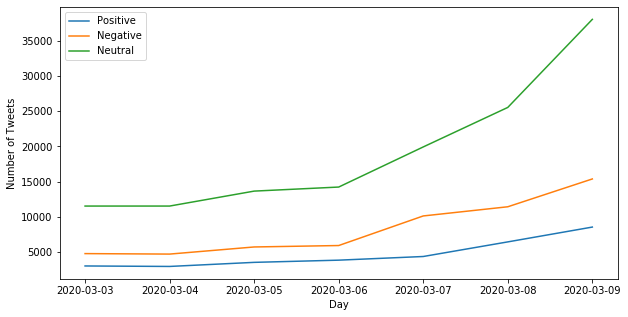

In [265]:
plt.figure(figsize=(10,5))
plt.plot(date2[1:-1],Pos2[1:-1], label="Positive")
plt.plot(date2[1:-1],Neg2[1:-1], label="Negative")
plt.plot(date2[1:-1],Neu2[1:-1], label="Neutral")
#plt.plot(date[2:],Sen[2:], label="Overall Sentiment")
plt.ylabel('Number of Tweets')
plt.xlabel('Day')
plt.legend()
plt.savefig=('/Users/kwanjeffrey/Desktop/Pioneer/SentimentVolumePandemic.png')
plt.show()

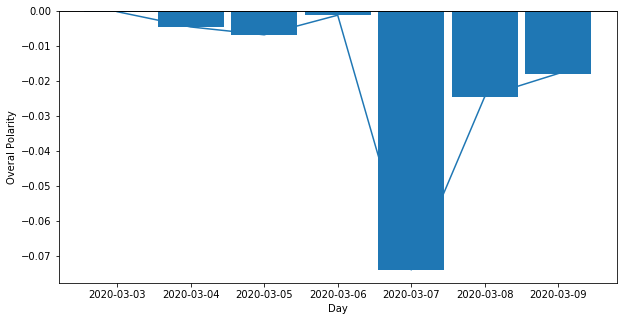

In [264]:
plt.figure(figsize=(10,5))
plt.plot(date2[1:-1],Sen2[1:-1], label="Overall Sentiment")
plt.axhline( color='black')
plt.bar(date2[1:-1], Sen2[1:-1], width=0.9,align='center')
plt.ylabel('Overal Polarity')
plt.xlabel('Day')
plt.savefig=('/Users/kwanjeffrey/Desktop/Pioneer/SentimentPandemic.png')
plt.show()